In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/MINTS/'

import sys
sys.path.append(path + 'Experiments')

import numpy as np
import matplotlib.pyplot as plt
from experiments import *


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# run this function to merge results from different task groups
#merge_results(path + 'Experiments/Data/', 'MAB', num_groups = 4)


In [3]:
# summarize the results
file_path = path + 'Experiments/Data/results_MAB_all_seeds.pkl'
summary_stats = summarize_results(file_path = file_path, benchmark = 'TS_Gaussian')


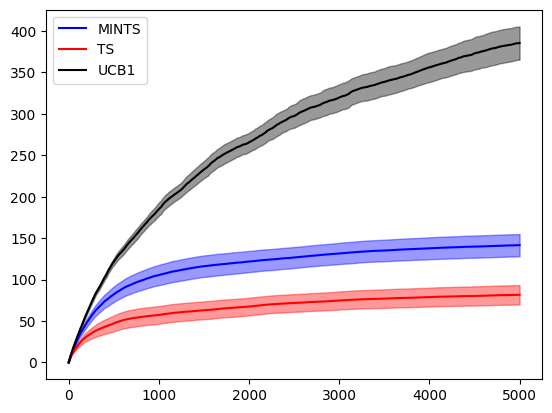

In [4]:
# visualize the results: regret

fig, ax = plt.subplots()

T = 5000 # number of rounds
list_methods = ['MINTS_Gaussian','TS_Gaussian', 'UCB1'] # list of methods
list_colors = ['b', 'r', 'k']
list_legends = ['MINTS', 'TS', 'UCB1']

# plot mean curves
grid_time = np.arange(T + 1)
for (i, method) in enumerate(list_methods):
    plt.plot(grid_time, summary_stats[method]['mean'], list_colors[i])

plt.legend(list_legends[:len(list_methods)])

# plot error bands
for (i, method) in enumerate(list_methods):
    mean = summary_stats[method]['mean']
    lower_bound = mean - 1.96 * summary_stats[method]['se']
    upper_bound = mean + 1.96 * summary_stats[method]['se']
    plt.fill_between(grid_time, lower_bound, upper_bound, color = list_colors[i], alpha=0.4)

plt.show()
fig.savefig(path + 'Experiments/MAB_regrets.pdf', format = 'pdf', transparent=True)



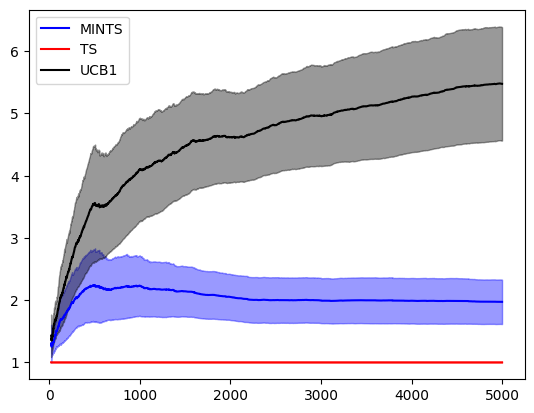

In [5]:
# visualize the results: ratios

fig, ax = plt.subplots()

# plot mean curves
time_start = 20
grid_time = np.arange(time_start, T + 1)
for (i, method) in enumerate(list_methods):
    plt.plot(grid_time, summary_stats[method]['mean_ratio'][time_start:], list_colors[i])

plt.legend(list_legends[:len(list_methods)])

# plot error bands
for (i, method) in enumerate(list_methods):
    mean = summary_stats[method]['mean_ratio'][time_start:]
    lower_bound = mean - 1.96 * summary_stats[method]['se_ratio'][time_start:]
    upper_bound = mean + 1.96 * summary_stats[method]['se_ratio'][time_start:]
    plt.fill_between(grid_time, lower_bound, upper_bound, color = list_colors[i], alpha=0.4)

plt.show()
fig.savefig(path + 'Experiments/MAB_ratios.pdf', format = 'pdf', transparent=True)
